Starting with the imports and the tesseract executable. (should work out of the box if the default path is used when installing the binary)

In [1]:
from pytesseract import Output

import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import csv

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Extracting the dictionnary data from the image and ploting the result. Will fail with noise.

In [3]:
filename = '../wireframes/3_annotated.png'
image = cv2.imread(filename)
results = pytesseract.image_to_data(image, output_type=Output.DICT)

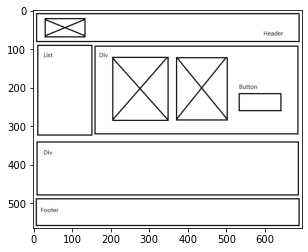

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
results

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1],
 'left': [0,
  30,
  30,
  30,
  30,
  598,
  29,
  29,
  29,
  29,
  173,
  535,
  535,
  535,
  535,
  29,
  29,
  29,
  29,
  22,
  22,
  22,
  22],
 'top': [0,
  21,
  21,
  21,
  21,
  54,
  111,
  111,
  111,
  111,
  111,
  193,

In [6]:
with open('../data/docs_data_words_clean.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')

    for i in range(0, len(results["text"])):
        x = results["left"][i]
        y = results["top"][i]
        w = results["width"][i]
        h = results["height"][i]

        text = results["text"][i]
        conf =  int(float(results["conf"][i]))

        if conf > 70:
            text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
            writer.writerow([text, (x, y), (w, h)])
            print(text, conf, x, y, w, h)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

Header 96 598 54 49 12
List 96 29 111 21 11
Div 96 173 111 21 11
Button 95 535 193 44 11
Div 96 29 363 21 11
Footer 96 22 512 44 11


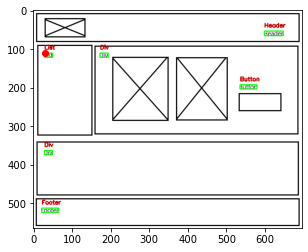

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('../results/docs_annotated.png', dpi=200)
plt.plot(29, 111, 'ro')
plt.savefig('../results/docs_ocr.png', dpi=200)
plt.show()

In [8]:
i = 0
prevIsBox = False
prevIsTriangle = False
picture_el_count = 0
currentBoxCenter = (0,0)
currentBoxContour = None

# reading image
img = cv2.imread('../wireframes/3.png')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

writer = None
with open('../data/docs_data_shapes.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
        #for line in contours:
            #writer.writerow(line)
            
    # list for storing names of shapes
    for contour in contours:
        # here we are ignoring first counter because 
        # findcontour function detects whole image as shape
        if i == 0:
            i = 1
            continue

        #print(contour.tolist())


        # cv2.approxPloyDP() function to approximate the shape
        approx = cv2.approxPolyDP(
            contour, 0.01 * cv2.arcLength(contour, True), True)



        # finding center point of shape
        M = cv2.moments(contour)
        if M['m00'] != 0.0:
            x = int(M['m10']/M['m00'])
            y = int(M['m01']/M['m00'])

        # putting shape name at center of each shape
        if len(approx) == 3:
            prevIsTriangle = True
            if (prevIsBox or prevIsTriangle):
                picture_el_count = picture_el_count + 1
                prevIsBox = False
            shape = 'Triangle' + str(i)
            #cv2.putText(img, '', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 200), 2)

        elif len(approx) == 4:
            if (prevIsBox):
                cv2.putText(img, 'Box' + str(i), currentBoxCenter, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 150), 2)
            prevIsBox = True
            picture_el_count = 1
            currentBoxCenter = (x, y)
            currentBoxContour = contour
            shape = 'Box' + str(i)
            #cv2.putText(img, '', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 150), 2)

        else:
            picture_el_count = 0
            shape = 'Rounded' + str(i)
            cv2.putText(img, shape, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (150, 0, 0), 2)

        print(shape)
        #print(picture_el_count)
       

        color = (0, 255, 0)
        if (shape == 'Box'  + str(i)):
            color = (0, 0, 100)
        elif (shape == 'Rounded'  + str(i)):
            color = (255, 0, 0)
        # using drawContours() function
        cv2.drawContours(img, [contour], 0, color, 5)

        res = np.concatenate(([[[shape, (x, y)]]], contour), axis=0)
        writer.writerow(res)
        
        if (picture_el_count == 5):
            print('Cluster of contours analysed as Picture.')
            shape = 'Picture' + str(i - 4)
            cv2.putText(img, shape, currentBoxCenter, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 150, 0), 2)
            res = np.concatenate(([[[shape, currentBoxCenter]]], currentBoxContour), axis=0)
            writer.writerow(res)
            picture_el_count = 0
        
        i = i + 1

Box1
Box2
Box3
Box4
Box5
Box6
Box7
Box8
Box9
Triangle10
Triangle11
Triangle12
Triangle13
Cluster of contours analysed as Picture.
Box14
Triangle15
Triangle16
Triangle17
Triangle18
Cluster of contours analysed as Picture.
Box19
Box20
Box21
Box22
Box23
Triangle24
Triangle25
Triangle26
Triangle27
Cluster of contours analysed as Picture.


In [9]:
# displaying the image after drawing contours
#cv2.imshow('shapes', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

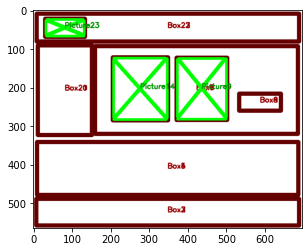

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.plot(12, 343, 'ro')
#plt.plot(12, 476, 'ro')
#plt.plot(684, 476, 'ro')
#plt.plot(684, 343, 'ro')
plt.savefig('../results/docs_struct_01.png', dpi=200)
plt.show()

# read csv

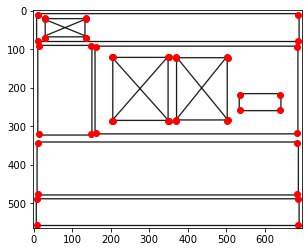

In [11]:
img = cv2.imread('../wireframes/3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
i = 0
writer = None
with open('../data/docs_data_shapes_clean.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')

    with open('../data/docs_data_shapes.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            #print(row)
            #print(data)
            #print(len(row))
            if (len(row) <= 4 + 1 or row[0].find('Picture') != -1):
                writer.writerow(row)
                for point in row:
                    if i == 0:
                        i = 1
                        continue
                    coord = point.strip('[]')
                    #print(coord)
                    x, y = coord.split()
                    #print(type(x))
                    plt.plot(int(x), int(y), 'ro')
            i = 0
    
plt.savefig('../results/docs_struct_02.png', dpi=200)
plt.show()